# 区块链基础

## 密钥

### 公钥与私钥（传统RSA：质数对）
基本的思路：
1. 公钥私钥成对生成
2. 由公钥加密的信息，只有对应的私钥才可以解密

### ECDSA(椭圆曲线签名算法）
基本的思路：
1. 私钥可以计算得出公钥，可以将公钥散布出去
2. 只要私钥签名过的东西，可以使用公钥验证是否配对（是不是私钥签名的）

### 私钥、公钥与地址


私钥->(base58 encode)生成易记的私钥助记符
私钥->(ECDSA椭圆曲线签名算法）公钥->（SHA-256哈希算法）地址->(base58 encode)易记地址

交易过程总结：泛洪网络给peers广播，矿工监听合法交易加入自己的内存池中，将节点排队打包为交易块，加入区块链中(图）：

# UTXO(Unspent Tx Output)
指还没有交易消费的记账输出
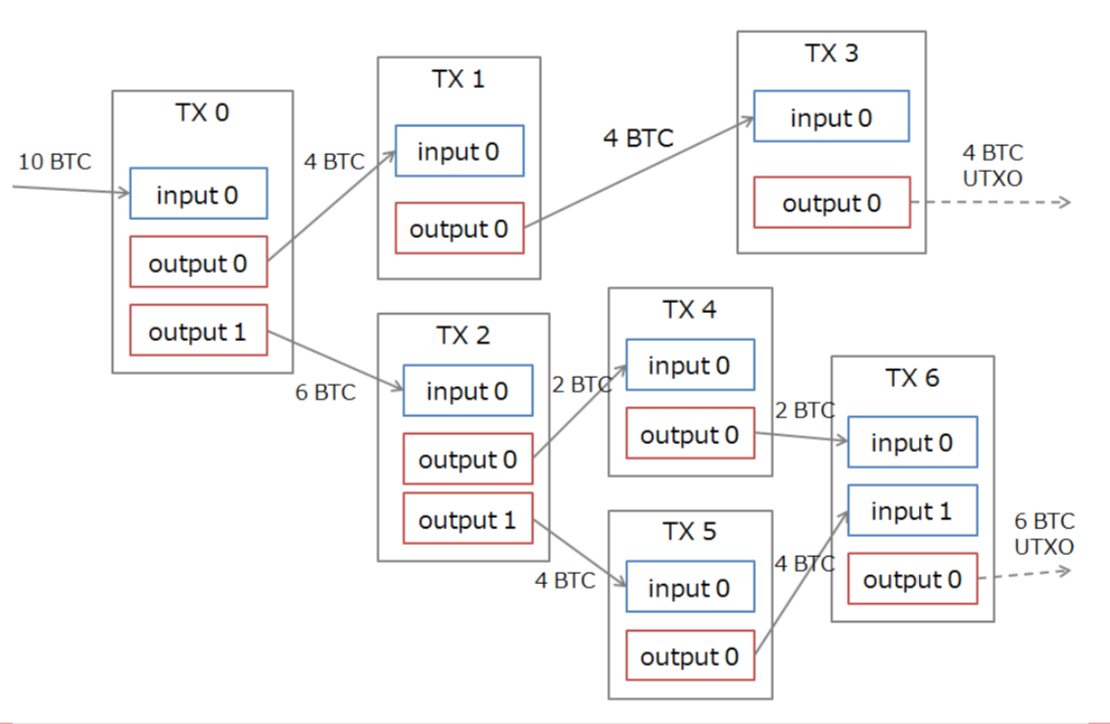

# 区块的构成
参考交易的过程，区块链的索引是索引到前一个节点的哈希，相当于一个反向的链表。
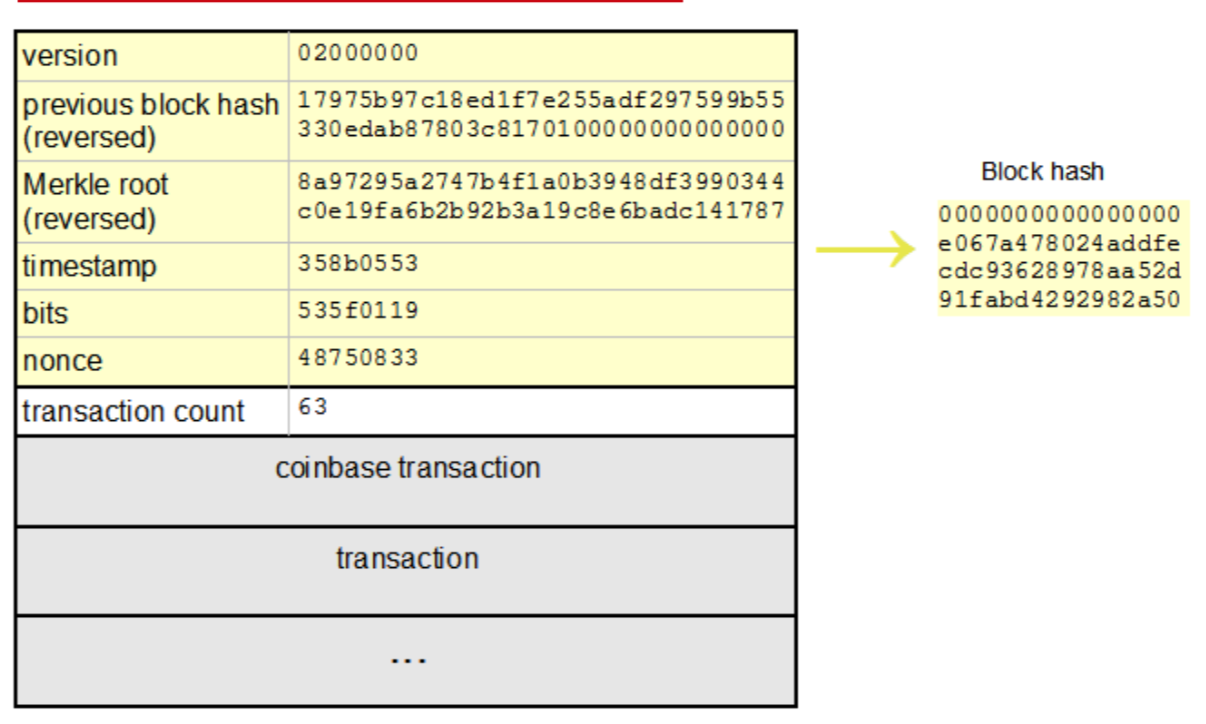

# 交易中的电子签名
## 1. 证明“我有足够的虚拟币”
提供公钥，引用之前的消费记录，验证现在的余额。
## 2. 证明消费者的身份
通过公钥，验证签名有效。

# 交易消息的构成
## 1. Input
### a) 之前交易的信息&index号(对之前UTXO的引用）->说明使用哪一个output来进行交易
### b) 解锁脚本(Unlocking Script)：相当于将被交易输出的虚拟币进行解锁使用，使用私钥生成的公钥来进行认证解锁。
解锁脚本："< sig >< PubKey >"即sig->签名，PubKey->公钥
    
## 2. Output
### a)  Amount of BTC's:比特币的数量（新的UTXO)
### b) 锁定脚本：将金额锁定起来，等待得到比特币转账的人进行解锁激活。
锁定脚本： "DUP HASH160 < PubKHash > EQUALVERIFY CHECKSIG"即PubKHash->交易的地址， CHECKSIG表示验证签名的动作

## 3. Peer对交易的脚本验证(P2PKH交易：Pay to Public Key Hash）
### 预备知识：逆波兰表达式（后缀表达式）
### 交易的过程是一种后缀的计算模式
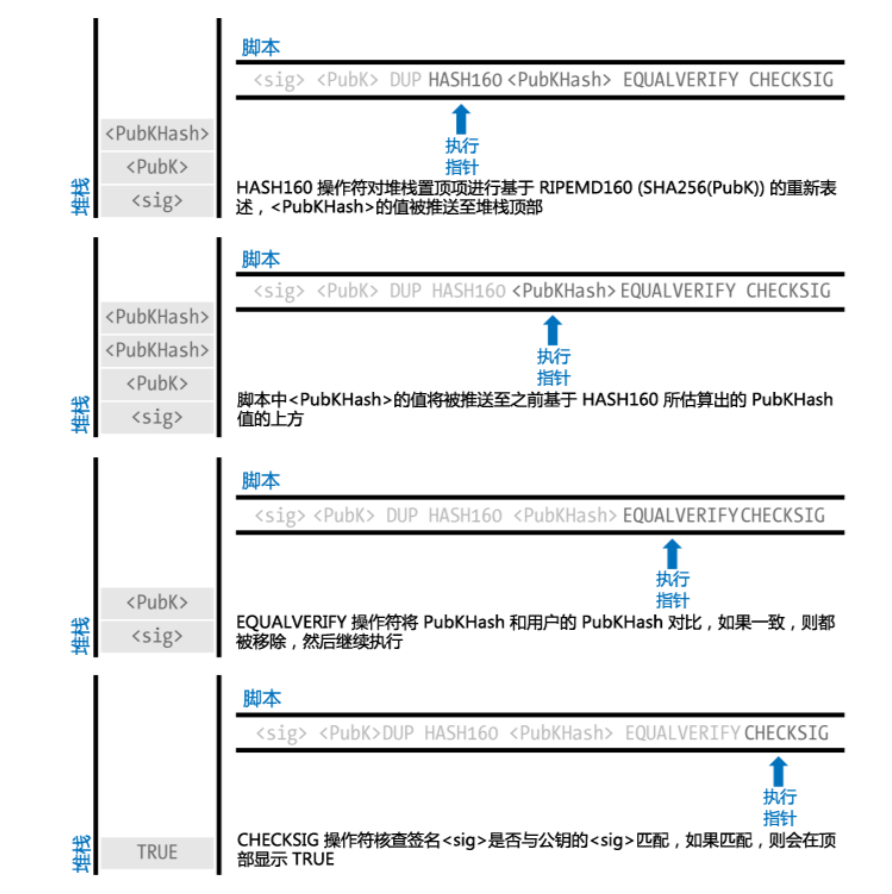
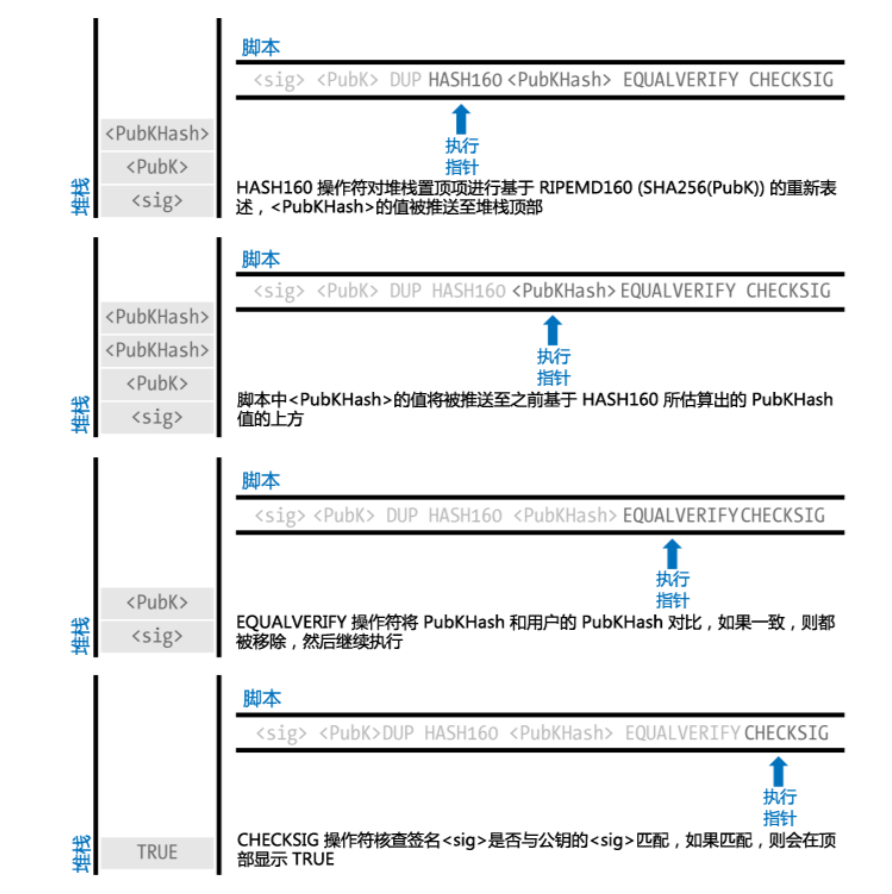

# 其它交易脚本
### P2PK脚本：
### MS(Multi-Signature)脚本：
可以实现验证多个签名才可以完成交易的模式
### OP_RETURN：
### P2SH(Pay-to-Script-Hash)脚本：
将交易的脚本变短，相当于多层的交易脚本

# Merkle树&SPV节点（Simple Payment Verify)

## Merkle树主要用来判别收到的数据块是否完全合法正确
Merkle树的叶子节点都是一个个数据块的哈希值，再使用几个叶子节点相连接再计算哈希，直到到达根节点。
假设多个网络传输多个数据块，在得到可靠节点传输的merkle节点数据根后就可以进行校验，如果匹配则传输完全正确。若不匹配则再请求下面节点的merkle哈希值，从而像二叉搜索树一样缩小范围搜索错误出在哪里，并重传数据块。

## SPV节点（简单的交易认证）
<em> SPV节点通过merkle树这种数据结构来进行简单的交易认证 </em>

### SPV节点存在的意义：
进行全比特币节点的维护过于复杂，很少有机器可以负载。需要使用“轻节点”来只下载与自己相关的部分区块链。

### SPV节点的工作模式
1. 首先只下载区块头
2. 通过这个区块头回溯一个merkle路径到要验证的交易，这样就可以证明这笔交易存在。